# Lanczos Spectrum demo
Minimal example on a tiny slice of WikiText-2.

In [2]:
import torch, matplotlib.pyplot as plt, numpy as np
from transformers import AutoModelForCausalLM
from datasets import load_dataset
from hessformer import run_lanczos, HvpMode

In [3]:
model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
model = AutoModelForCausalLM.from_pretrained(model_name,
    torch_dtype=torch.bfloat16, device_map="auto").eval()

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


In [4]:
ds = load_dataset("wikitext", "wikitext-2-raw-v1", split="train[:1%]")

In [5]:
out = run_lanczos(model, ds, num_iter=10,
                  hvp_mode=HvpMode.REV_FWD,
                  batch_size=2)

HVP computation: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [01:12<00:00,  2.53it/s]


In [7]:
eigvals

tensor([-1.1214e+00, -6.4872e-01, -5.1918e-02, -8.6441e-03, -7.5931e-12,
         9.3703e-04,  9.0717e-03,  5.1645e-02,  6.4723e-01,  1.1210e+00])

In [8]:
gammas

tensor([1.3303e-15, 1.6876e-13, 4.3661e-12, 6.6829e-10, 1.0000e+00, 1.7783e-10,
        5.0391e-10, 2.9770e-12, 1.6801e-13, 2.6686e-13])

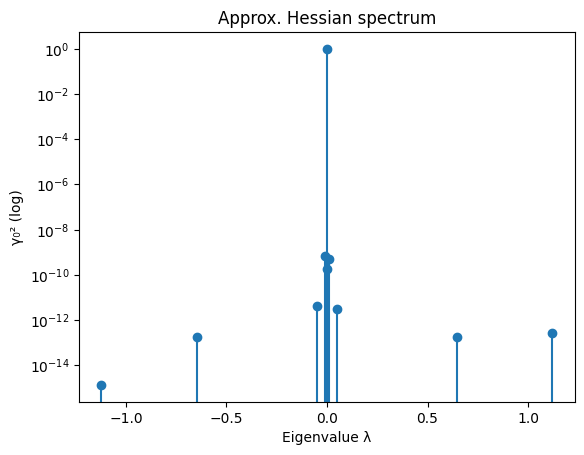

In [10]:
eigvals_np = out["spec"]["eigvals"].detach().cpu().numpy()
gammas_np  = out["spec"]["gammas"].detach().cpu().numpy()

plt.stem(eigvals_np, gammas_np, basefmt=" ")
plt.yscale("log")
plt.xlabel("Eigenvalue λ")
plt.ylabel("γ₀² (log)")
plt.title("Approx. Hessian spectrum")
plt.show()


You can also build a global histogram of the Lanczos-estimated eigen‐density.

Text(0.5, 1.0, 'Lanczos density estimate')

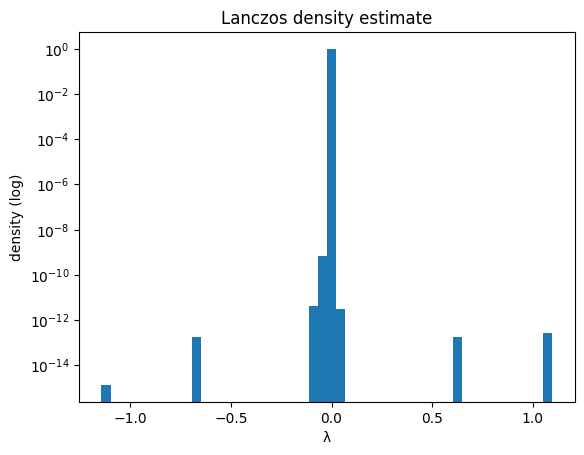

In [11]:
hist, bins = np.histogram(eigvals.numpy(), bins=50, weights=gammas.numpy())
plt.bar(bins[:-1], hist, width=bins[1]-bins[0])
plt.yscale('log')
plt.xlabel('λ')
plt.ylabel('density (log)')
plt.title('Lanczos density estimate')